In [1]:
from neuron import h, gui
######################################
# loading the  model
# we use a hoc template in order to load the morphology
######################################
post_morph_dir = "fitting_exsamale/morph.swc"
h.load_file("import3d.hoc")
h.load_file("nrngui.hoc")
h("objref cell, tobj")

morph_file = post_morph_dir
model_file = "template_model"
model_path = "fitting_exsamale/"
h.load_file(model_path + model_file + ".hoc")
h.execute("cell = new " + model_file + "()") 

nl = h.Import3d_SWC_read()
nl.quiet = 1
nl.input(morph_file)
imprt = h.Import3d_GUI(nl, 0)
imprt.instantiate(h.cell)
cell = h.cell

#inserting passive mechanism
for sec in cell.all:
    sec.insert("pas")

	-65 


In [3]:
# check the graphs

# open the graph on shape plot
# check the shape of the neuron, change the view to also see the diameter 
# lets check the diameter change as a function of distance

# geting all dendrite terminales
terminals_basal = set()
terminals_apical = set()

for sec in cell.dend:
    sref = h.SectionRef(sec=sec)
    if sref.nchild() == 0:
         terminals_basal.add(sec)

for sec in cell.apic:
    sref = h.SectionRef(sec=sec)
    if sref.nchild() == 0:
         terminals_apical.add(sec)


In [4]:
print("number of apical terminals:",len(terminals_apical))
print("number of basal terminals:",len(terminals_basal))

number of apical terminals: 19
number of basal terminals: 19


In [6]:
h.distance(0,0.5, cell.soma[0])

0.5

In [15]:
import matplotlib.pyplot as plt
def plot_section_diam(section, start_diam = 0, start_distance = 0 , c='red'):
    start_distance = h.distance(section(0))
    start_diam = section(0).diam
    for seg in section:
        plt.plot([start_distance,  h.distance(section(seg.x))], [start_diam, seg.diam], color=c)

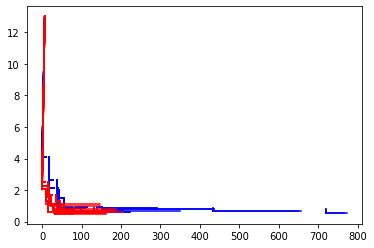

In [22]:
for section in terminals_apical:
    cur_sec = section
    while cur_sec != cell.soma[0]:
        plot_section_diam(cur_sec, start_diam = 0, start_distance = 0 ,c='b')
        end_diam = cur_sec(0).diam
        end_distance = h.distance(cur_sec(0))
        cur_sec = h.SectionRef(sec = cur_sec).parent
        plt.plot([end_distance, h.distance(cur_sec(1))], [end_diam, cur_sec(1).diam], color='b')

for section in terminals_basal:
    cur_sec = section
    while cur_sec != cell.soma[0]:
        plot_section_diam(cur_sec, start_diam = 0, start_distance = 0 ,c='r')
        end_diam = cur_sec(0).diam
        end_distance = h.distance(cur_sec(0))
        cur_sec = h.SectionRef(sec = cur_sec).parent
        plt.plot([end_distance, h.distance(cur_sec(1))], [end_diam, cur_sec(1).diam], color='r')

In [27]:
# now look on next graph of the voltage
# lets add an IClamp

clamp = h.IClamp(cell.soma[0](0.5))
clamp.amp = 0.5
clamp.dur = 1000
clamp.delay = 200
h.v_init = -70
for sec in cell.all:
    sec.g_pas = 1.0 / 20000.0
    sec.Ra = 100
    sec.e_pas = -70
h.tstop = 1500


In [29]:
# before runing the simulation open the voltage graph and see the  voltage in the soma during the simulation
h.run()

0.0